In [34]:
# Import data and perform processing 
import os as os 

In [35]:
# import the relevent package
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier   # we are applying the boosting techinque
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# Setting the working directory

In [36]:
os.chdir('C:\\Users\\MyPC\\Desktop\\Capstone Project\\HR Analytics')

In [37]:
os.getcwd()

'C:\\Users\\MyPC\\Desktop\\Capstone Project\\HR Analytics'

In [38]:
os.listdir()

['DataDictionary-HR Analytics.xlsx',
 'HR Analytics.pdf',
 'staff utlz latest 16-17_masked.xlsx',
 'staff utlz latest 17-18_masked.xlsx',
 'Terminations 15-18.xlsx',
 '~$DataDictionary-HR Analytics.xlsx',
 '~$Terminations 15-18.xlsx']

In [39]:
import xlrd
# read the dataset
df = pd.read_excel('staff utlz latest 16-17_masked.xlsx')

df1 = pd.read_excel('staff utlz latest 17-18_masked.xlsx')

df2 = pd.read_excel('Terminations 15-18.xlsx')

In [40]:
# check the dimension of the datset
print("Dimension of the df data",df.shape)
print("Dimension of the df1 data",df1.shape)
print("Dimension of the df1 data",df2.shape)

Dimension of the df data (789, 115)
Dimension of the df1 data (973, 115)
Dimension of the df1 data (293, 9)


In [41]:
import warnings
warnings.filterwarnings('ignore')

# Concatingnating dataset

In [42]:
alldata = df.append(df1) 
 
# here we are concatinating df and df1 dataset using .append method

In [43]:
alldata = alldata.append(df2)

# here we are concatinating alldat and df2 dataset using .append method

In [44]:
alldata.head()


,Employee No,Profit Center,Employee Name,Employee Position,Employee Location,People Group,Employee Category,Supervisor name,Join Date,Current Status,...,NC Hours-Mar-18,Utilization%-Mar-18,Employee Number,YEAR of Birth,Gender,Leaving Reason,Previous Employer,Last Update Date,Latest Available Rating,Emp Ref.
0,1.0,PC - 1,Rochette Jilleen,Level 2,Location 3,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,2.0,PC - 2,Daryl Natalina,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,1999-05-31,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,3.0,PC - 2,Annnora Gabrielle,Level 2,Location 7,Client Service Staff,Level 1/2,Idalina Lauraine,2001-01-31,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,4.0,PC - 3,Barbee Joey,Level 2,Location 1,Client Service Staff,Level 1/2,Idalina Lauraine,2000-09-30,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,5.0,PC - 4,Idalina Lauraine,Level 1,Location 3,Client Service Staff,Level 1/2,Abagail Druci,1998-06-30,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [45]:
# check the dimension of the datset
print("Dimension of the df data",df.shape)
print("Dimension of the df1 data",df1.shape)
print("Dimension of the df1 data",df2.shape)

Dimension of the df data (789, 115)
Dimension of the df1 data (973, 115)
Dimension of the df1 data (293, 9)


In [46]:
alldata.shape

(2055, 219)

In [47]:
alldata.columns.values

array(['Employee No', 'Profit Center', 'Employee Name',
       'Employee Position', 'Employee Location', 'People Group',
       'Employee Category', 'Supervisor name', 'Join Date',
       'Current Status', 'Termination Date', 'Total Hours-Apr-16',
       'Total Available Hours-Apr-16', 'Work Hours-Apr-16',
       'Leave Hours-Apr-16', 'Training Hours-Apr-16', 'BD Hours-Apr-16',
       'NC Hours-Apr-16', 'Utilization%-Apr-16', 'Total Hours-May-16',
       'Total Available Hours-May-16', 'Work Hours-May-16',
       'Leave Hours-May-16', 'Training Hours-May-16', 'BD Hours-May-16',
       'NC Hours-May-16', 'Utilization%-May-16', 'Total Hours-Jun-16',
       'Total Available Hours-Jun-16', 'Work Hours-Jun-16',
       'Leave Hours-Jun-16', 'Training Hours-Jun-16', 'BD Hours-Jun-16',
       'NC Hours-Jun-16', 'Utilization%-Jun-16', 'Total Hours-Jul-16',
       'Total Available Hours-Jul-16', 'Work Hours-Jul-16',
       'Leave Hours-Jul-16', 'Training Hours-Jul-16', 'BD Hours-Jul-16',
       

In [48]:
# dropping the unimportant variables and also some variable having missing values 80%
new_data = alldata.drop(['Employee No','Employee Number','Join Date','Supervisor name',
       'Previous Employer','Last Update Date','Emp Ref.','Employee Name','Latest  Available Rating',
       'YEAR of Birth','Termination Date', 'Total Hours-Apr-16', 'Total Available Hours-Apr-16','Work Hours-Apr-16',
       'Leave Hours-Apr-16', 'Training Hours-Apr-16',
       'BD Hours-Apr-16', 'NC Hours-Apr-16', 'Utilization%-Apr-16',
       'Total Hours-May-16', 'Total Available Hours-May-16',
       'Work Hours-May-16', 'Leave Hours-May-16', 'Training Hours-May-16',
       'BD Hours-May-16', 'NC Hours-May-16', 'Utilization%-May-16',
       'Total Hours-Jun-16', 'Total Available Hours-Jun-16',
       'Work Hours-Jun-16', 'Leave Hours-Jun-16', 'Training Hours-Jun-16',
       'BD Hours-Jun-16', 'NC Hours-Jun-16', 'Utilization%-Jun-16',
       'Total Hours-Jul-16', 'Total Available Hours-Jul-16',
       'Work Hours-Jul-16', 'Leave Hours-Jul-16', 'Training Hours-Jul-16',
       'BD Hours-Jul-16', 'NC Hours-Jul-16', 'Utilization%-Jul-16',
       'Total Hours-Aug-16', 'Total Available Hours-Aug-16',
       'Work Hours-Aug-16', 'Leave Hours-Aug-16', 'Training Hours-Aug-16',
       'BD Hours-Aug-16', 'NC Hours-Aug-16', 'Utilization%-Aug-16',
       'Total Hours-Sep-16', 'Total Available Hours-Sep-16',
       'Work Hours-Sep-16', 'Leave Hours-Sep-16', 'Training Hours-Sep-16',
       'BD Hours-Sep-16', 'NC Hours-Sep-16', 'Utilization%-Sep-16',
       'Total Hours-Oct-16', 'Total Available Hours-Oct-16',
       'Work Hours-Oct-16', 'Leave Hours-Oct-16', 'Training Hours-Oct-16',
       'BD Hours-Oct-16', 'NC Hours-Oct-16', 'Utilization%-Oct-16',
       'Total Hours-Nov-16', 'Total Available Hours-Nov-16',
       'Work Hours-Nov-16', 'Leave Hours-Nov-16', 'Training Hours-Nov-16',
       'BD Hours-Nov-16', 'NC Hours-Nov-16', 'Utilization%-Nov-16',
       'Total Hours-Dec-16', 'Total Available Hours-Dec-16',
       'Work Hours-Dec-16', 'Leave Hours-Dec-16', 'Training Hours-Dec-16',
       'BD Hours-Dec-16', 'NC Hours-Dec-16', 'Utilization%-Dec-16',
       'Total Hours-Jan-17', 'Total Available Hours-Jan-17',
       'Work Hours-Jan-17', 'Leave Hours-Jan-17', 'Training Hours-Jan-17',
       'BD Hours-Jan-17', 'NC Hours-Jan-17', 'Utilization%-Jan-17',
       'Total Hours-Feb-17', 'Total Available Hours-Feb-17',
       'Work Hours-Feb-17', 'Leave Hours-Feb-17', 'Training Hours-Feb-17',
       'BD Hours-Feb-17', 'NC Hours-Feb-17', 'Utilization%-Feb-17',
       'Total Hours-Mar-17', 'Total Available Hours-Mar-17',
       'Work Hours-Mar-17', 'Leave Hours-Mar-17', 'Training Hours-Mar-17',
       'BD Hours-Mar-17', 'NC Hours-Mar-17', 'Utilization%-Mar-17',
       'Total Hours-Apr-17','Total Available Hours-Apr-17', 'Work Hours-Apr-17',
       'Leave Hours-Apr-17', 'Training Hours-Apr-17', 'BD Hours-Apr-17',
       'NC Hours-Apr-17', 'Utilization%-Apr-17', 'Total Hours-May-17',
       'Total Available Hours-May-17', 'Work Hours-May-17',
       'Leave Hours-May-17', 'Training Hours-May-17', 'BD Hours-May-17',
       'NC Hours-May-17', 'Utilization%-May-17', 'Total Hours-Jun-17',
       'Total Available Hours-Jun-17', 'Work Hours-Jun-17',
       'Leave Hours-Jun-17', 'Training Hours-Jun-17', 'BD Hours-Jun-17',
       'NC Hours-Jun-17', 'Utilization%-Jun-17', 'Total Hours-Jul-17',
       'Total Available Hours-Jul-17', 'Work Hours-Jul-17',
       'Leave Hours-Jul-17', 'Training Hours-Jul-17', 'BD Hours-Jul-17',
       'NC Hours-Jul-17', 'Utilization%-Jul-17', 'Total Hours-Aug-17',
       'Total Available Hours-Aug-17', 'Work Hours-Aug-17',
       'Leave Hours-Aug-17', 'Training Hours-Aug-17', 'BD Hours-Aug-17',
       'NC Hours-Aug-17', 'Utilization%-Aug-17', 'Total Hours-Sep-17',
       'Total Available Hours-Sep-17', 'Work Hours-Sep-17',
       'Leave Hours-Sep-17', 'Training Hours-Sep-17', 'BD Hours-Sep-17',
       'NC Hours-Sep-17', 'Utilization%-Sep-17', 'Total Hours-Oct-17',
       'Total Available Hours-Oct-17', 'Work Hours-Oct-17',
       'Leave Hours-Oct-17', 'Training Hours-Oct-17', 'BD Hours-Oct-17',
       'NC Hours-Oct-17', 'Utilization%-Oct-17', 'Total Hours-Nov-17',
       'Total Available Hours-Nov-17', 'Work Hours-Nov-17',
       'Leave Hours-Nov-17', 'Training Hours-Nov-17', 'BD Hours-Nov-17',
       'NC Hours-Nov-17', 'Utilization%-Nov-17', 'Total Hours-Dec-17',
       'Total Available Hours-Dec-17', 'Work Hours-Dec-17',
       'Leave Hours-Dec-17', 'Training Hours-Dec-17', 'BD Hours-Dec-17',
       'NC Hours-Dec-17', 'Utilization%-Dec-17', 'Total Hours-Jan-18',
       'Total Available Hours-Jan-18', 'Work Hours-Jan-18',
       'Leave Hours-Jan-18', 'Training Hours-Jan-18', 'BD Hours-Jan-18',
       'NC Hours-Jan-18', 'Utilization%-Jan-18', 'Total Hours-Feb-18',
       'Total Available Hours-Feb-18', 'Work Hours-Feb-18',
       'Leave Hours-Feb-18', 'Training Hours-Feb-18', 'BD Hours-Feb-18',
       'NC Hours-Feb-18', 'Utilization%-Feb-18', 'Total Hours-Mar-18',
       'Total Available Hours-Mar-18', 'Work Hours-Mar-18',
       'Leave Hours-Mar-18', 'Training Hours-Mar-18', 'BD Hours-Mar-18',
       'NC Hours-Mar-18', 'Utilization%-Mar-18'], axis=1)

In [49]:
new_data.shape

(2055, 16)

# Checking datatypes

In [50]:
new_data.dtypes


Profit Center                 object
Employee Position             object
Employee Location             object
People Group                  object
Employee Category             object
Current Status                object
Avg Total Hours              float64
Avg Total Available Hours    float64
Avg Work Hours               float64
Avg Leave Hours              float64
Avg Training Hours           float64
Avg BD Hours                 float64
Avg NC Hours                 float64
Avg Utilization%              object
Gender                        object
Leaving Reason                object
dtype: object

# Summary Statistic

Here we take a look at the summary of each attributes

In [51]:
new_data.describe()
    

,Avg Total Hours,Avg Total Available Hours,Avg Work Hours,Avg Leave Hours,Avg Training Hours,Avg BD Hours,Avg NC Hours
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
mean,1650.238365,1436.809132,1084.965897,183.500284,30.521459,69.501135,364.052202
std,643.610294,579.894300,640.804918,164.025275,31.246483,262.206277,388.732284
min,0.000000,-40.000000,-42.000000,0.000000,-11.000000,-24.000000,-28.500000
25%,1400.000000,1160.625000,528.000000,97.000000,6.500000,0.000000,80.000000
50%,2080.000000,1747.750000,1209.250000,172.500000,22.500000,0.000000,243.000000
75%,2080.000000,1852.000000,1640.500000,240.000000,44.000000,0.000000,504.000000
max,2088.000000,2088.000000,2669.000000,2080.000000,169.000000,2015.000000,2458.500000


In [52]:
# check for missing values
missing = new_data.isnull().sum()/len(new_data)
missing

Profit Center                0.142579
Employee Position            0.142579
Employee Location            0.142579
People Group                 0.142579
Employee Category            0.142579
Current Status               0.142579
Avg Total Hours              0.142579
Avg Total Available Hours    0.142579
Avg Work Hours               0.142579
Avg Leave Hours              0.142579
Avg Training Hours           0.142579
Avg BD Hours                 0.142579
Avg NC Hours                 0.142579
Avg Utilization%             0.142579
Gender                       0.857421
Leaving Reason               0.857421
dtype: float64

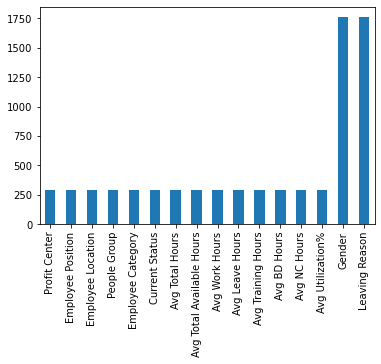

In [53]:
# check for missing values
missing = new_data.isnull().sum()
missing = missing[missing > 0]    # wherever you have missing values greater than 0 it is doing the bar plot.

# We can use bar plot to check missing values
missing.sort_values(inplace=True)
missing.plot.bar()

plt.show()

# A lot of missing values are present in the datasets.

In [54]:
df1=new_data.replace(np.NaN, 0)

In [55]:
df2=df1.replace(['-'],[0])

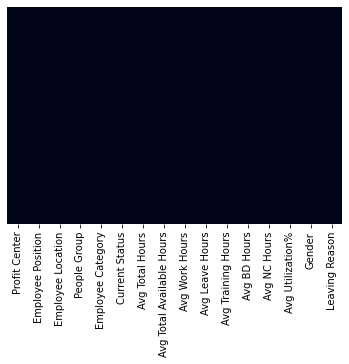

In [56]:
# using heatmap to figure out missing data if any
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False) 

In [57]:
# Again check for missing values
df2.isnull().sum()

Profit Center                0
Employee Position            0
Employee Location            0
People Group                 0
Employee Category            0
Current Status               0
Avg Total Hours              0
Avg Total Available Hours    0
Avg Work Hours               0
Avg Leave Hours              0
Avg Training Hours           0
Avg BD Hours                 0
Avg NC Hours                 0
Avg Utilization%             0
Gender                       0
Leaving Reason               0
dtype: int64

# Examine the numerical and categorical features in the dataset after missing value treatment 

In [58]:
df_numeric_features = df2.select_dtypes(include=[np.number])

df_numeric_features.columns

# here we are creating an object to have all the numeric features in it.

Index(['Avg Total Hours', 'Avg Total Available Hours', 'Avg Work Hours',
       'Avg Leave Hours', 'Avg Training Hours', 'Avg BD Hours', 'Avg NC Hours',
       'Avg Utilization%'],
      dtype='object')

In [59]:
df_numeric_features.shape

(2055, 8)

In [60]:
df_numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055 entries, 0 to 292
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg Total Hours            2055 non-null   float64
 1   Avg Total Available Hours  2055 non-null   float64
 2   Avg Work Hours             2055 non-null   float64
 3   Avg Leave Hours            2055 non-null   float64
 4   Avg Training Hours         2055 non-null   float64
 5   Avg BD Hours               2055 non-null   float64
 6   Avg NC Hours               2055 non-null   float64
 7   Avg Utilization%           2055 non-null   float64
dtypes: float64(8)
memory usage: 144.5 KB


In [61]:
df_numeric_features.head()

,Avg Total Hours,Avg Total Available Hours,Avg Work Hours,Avg Leave Hours,Avg Training Hours,Avg BD Hours,Avg NC Hours,Avg Utilization%
0,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941
1,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165
2,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102
3,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488
4,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651


# Correlation Matrix

In [62]:
import seaborn as sns

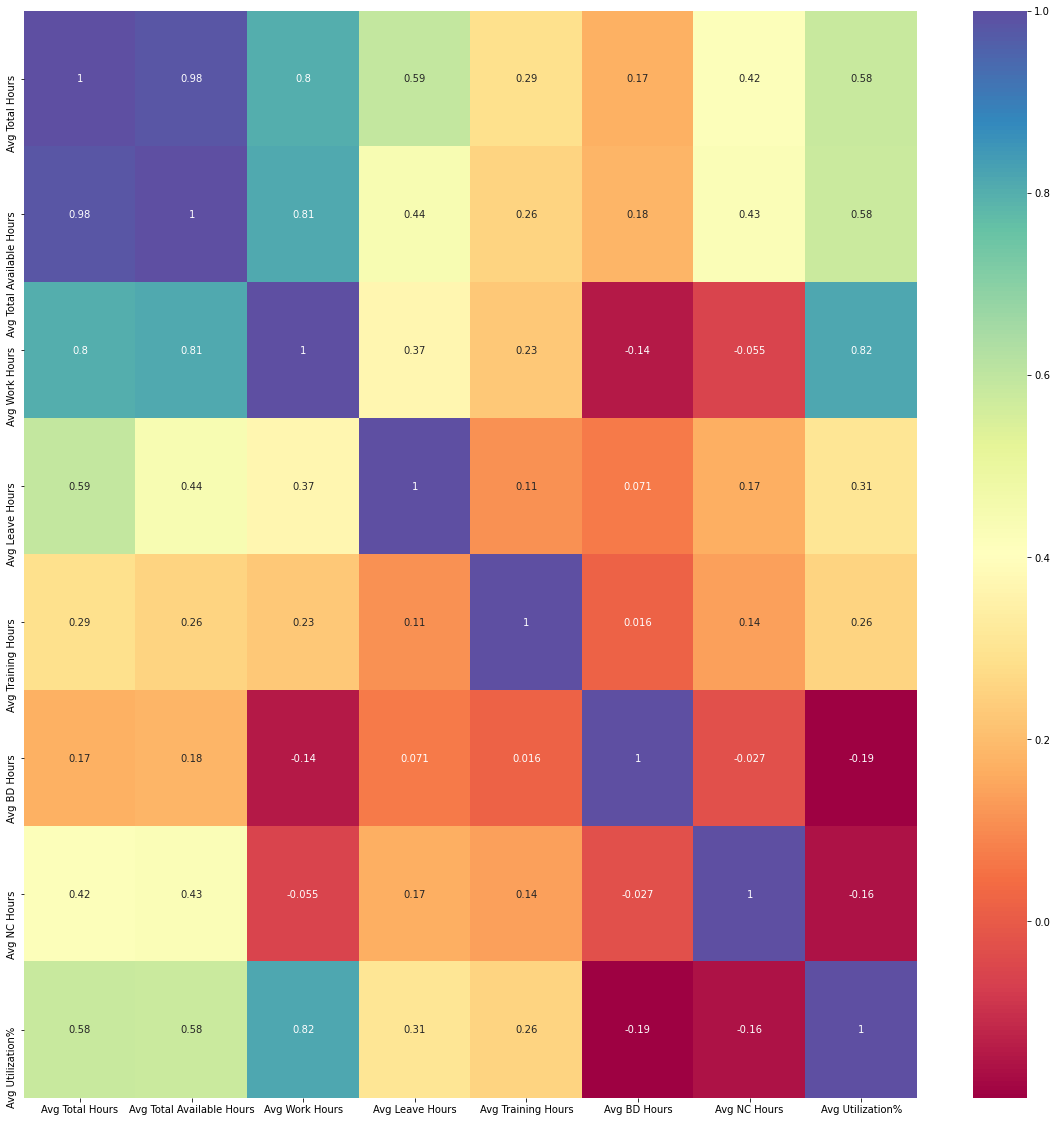

In [63]:
# calculating correlation among numeric variable
corr_matrix = df_numeric_features.corr()

# plot correlation matrix
plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix,cmap='Spectral',annot=True);  # if you put annot=False all the cor values will be remove in this plot.

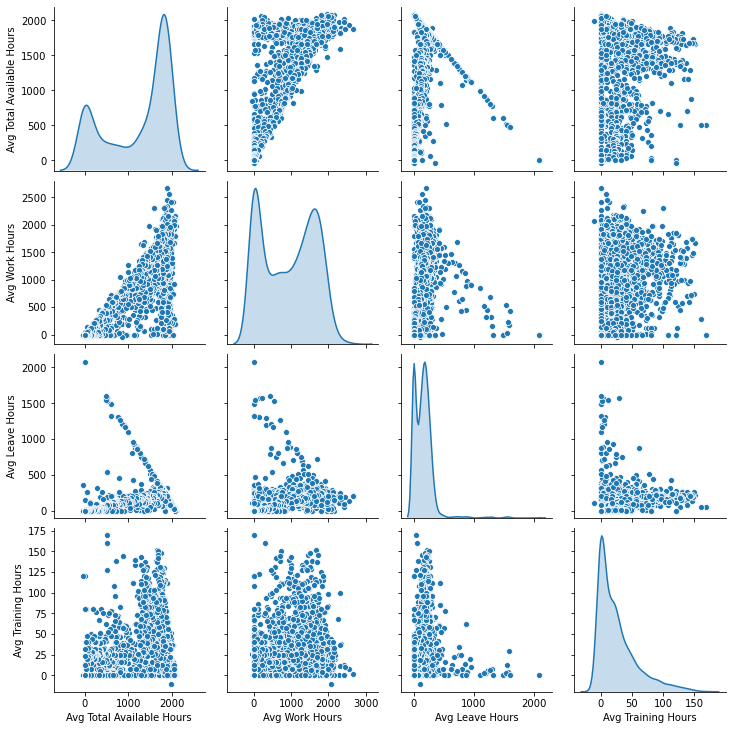

In [64]:
sns.pairplot(df_numeric_features.iloc[:,1:5],diag_kind="kde")

# This is the pairplots for 1st 5 variables and diag_kind is kde (kernel density estimates)

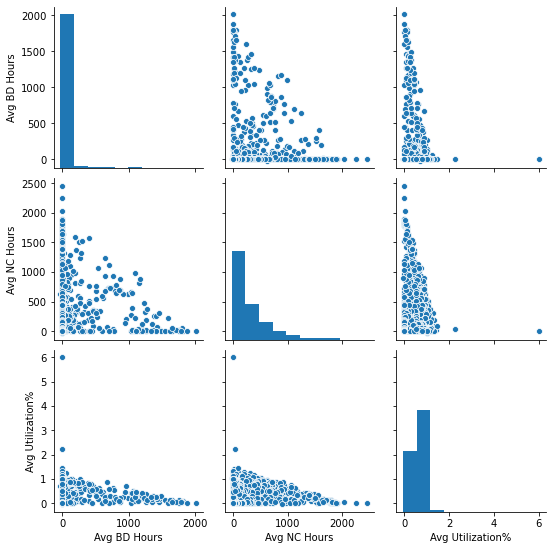

In [65]:
sns.pairplot(df_numeric_features.iloc[:,5:9],diag_kind="hist")

# all the diagnal elements have histogram.

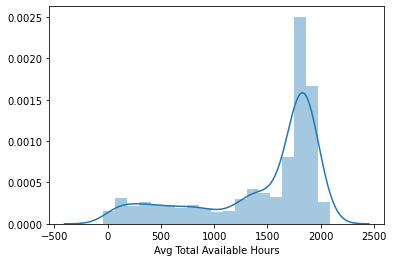

In [66]:
import seaborn as sns

sns.distplot(new_data['Avg Total Available Hours'])

plt.show()  # distribution of Avg Total Available Hours

# showing left skewed in this between 1500 and 2000 Avg Total Available Hours very high

In [67]:
df_numeric_features.columns

Index(['Avg Total Hours', 'Avg Total Available Hours', 'Avg Work Hours',
       'Avg Leave Hours', 'Avg Training Hours', 'Avg BD Hours', 'Avg NC Hours',
       'Avg Utilization%'],
      dtype='object')

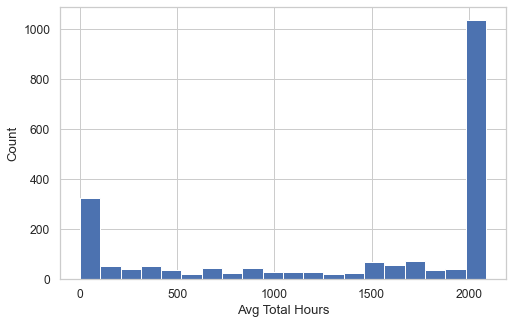

In [68]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df2['Avg Total Hours'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Avg Total Hours', ylabel='Count');

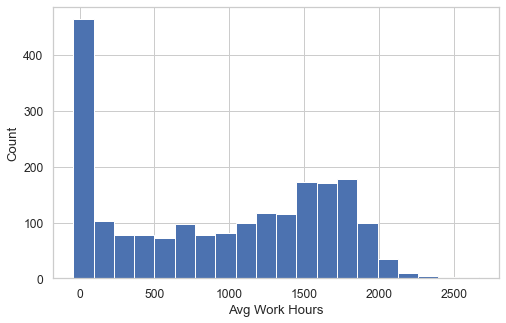

In [69]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df2['Avg Work Hours'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Avg Work Hours', ylabel='Count');

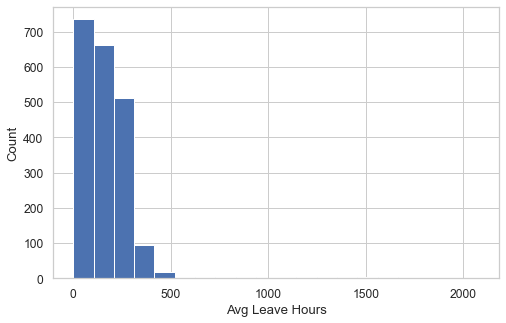

In [70]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df2['Avg Leave Hours'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Avg Leave Hours', ylabel='Count');

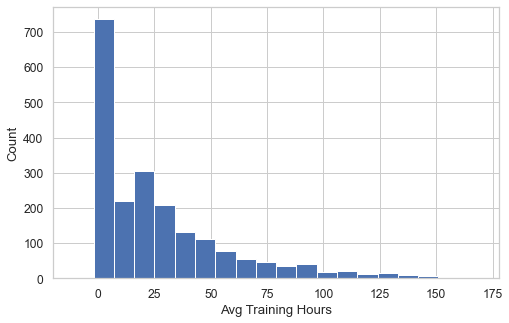

In [71]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df2['Avg Training Hours'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Avg Training Hours', ylabel='Count');

In [72]:
df2.columns

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category', 'Current Status',
       'Avg Total Hours', 'Avg Total Available Hours', 'Avg Work Hours',
       'Avg Leave Hours', 'Avg Training Hours', 'Avg BD Hours', 'Avg NC Hours',
       'Avg Utilization%', 'Gender', 'Leaving Reason'],
      dtype='object')

In [ ]:
df_categorical_features = df2.select_dtypes(include=[np.object])

df_categorical_features.columns

# In this object have all the categorical features.

In [ ]:
df_categorical_features.shape

In [ ]:
df_categorical_features.head()

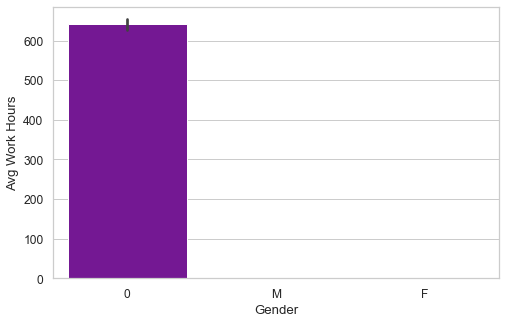

In [74]:
sns.barplot(x ='Gender', y ='Avg Work Hours', data = df2,  
            palette ='plasma', estimator = np.std) 

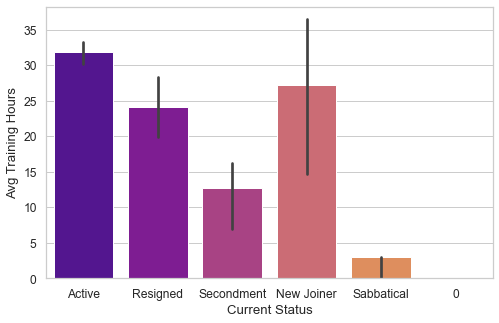

In [75]:
sns.barplot(x ='Current Status', y ='Avg Training Hours', data = df2,  
            palette ='plasma', estimator = np.std) 

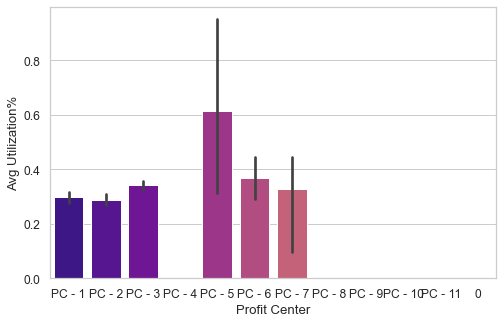

In [81]:
sns.barplot(x ='Profit Center', y ='Avg Utilization%', data = df2,  
            palette ='plasma', estimator = np.std) 

In [34]:
df_categorical_features = df2.select_dtypes(include=[np.object])

df_categorical_features.columns

# In this object have all the categorical features.

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category', 'Current Status', 'Gender',
       'Leaving Reason'],
      dtype='object')

In [35]:
df_categorical_features.shape

(2055, 8)

In [36]:
df_categorical_features.head()

,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Gender,Leaving Reason
0,PC - 1,Level 2,Location 3,Client Service Staff,Level 1/2,Active,0,0
1,PC - 2,Level 2,Location 7,Client Service Staff,Level 1/2,Active,0,0
2,PC - 2,Level 2,Location 7,Client Service Staff,Level 1/2,Active,0,0
3,PC - 3,Level 2,Location 1,Client Service Staff,Level 1/2,Active,0,0
4,PC - 4,Level 1,Location 3,Client Service Staff,Level 1/2,Active,0,0


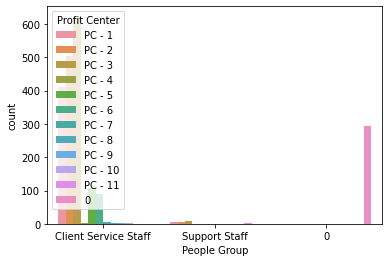

In [37]:
sns.countplot(x='People Group',hue='Profit Center',data=df2);
plt.show()

# Approximetly 650 employees have clent group and they are falls in profit center 3.
# 300 employees dont have any group.

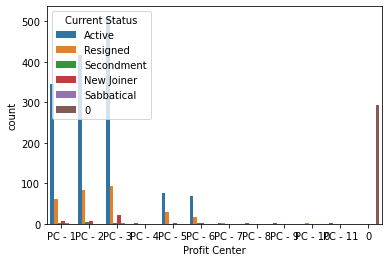

In [38]:

sns.countplot(x='Profit Center',hue='Current Status',data=df2);
plt.show()

# In case of profit center 1 and 2 active employees are very high.
# profit center 6,7,8,9 there are no employees active.

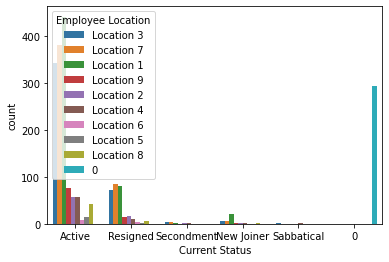

In [39]:
sns.countplot(x='Current Status',hue='Employee Location',data=df2);
plt.show()

# Location 3,7 and 1 between 300 and 450 employees are active and 100 employees are resigned.
# almost 300 employees have dont any location

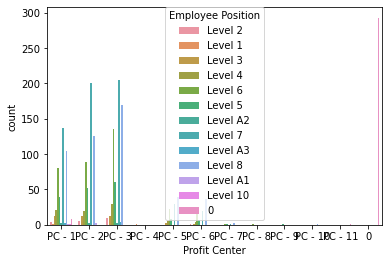

In [40]:
sns.countplot(x='Profit Center',hue='Employee Position',data=df2);
plt.show()

# 290 employees which do not have any position.
# profit center 1 there are 200 employees which falls in level 8 and 90 employees which falls in level 5


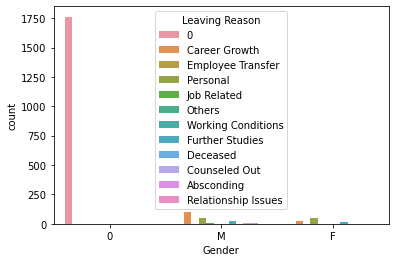

In [41]:
sns.countplot(x='Gender',hue='Leaving Reason',data=df2);
plt.show()

# There are 1750 employees which dont given leaving reason.
# 100 males are leaving company because of career growth. And approximetly 50 females giving job related reasons.

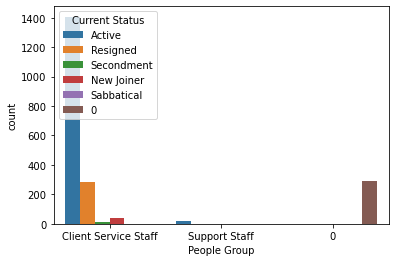

In [42]:
sns.countplot(x='People Group',hue='Current Status',data=df2);
plt.show()

# In Client group 1400 employees are active and 240 employees resigned.
# In Service Staff almost 30 employees are New Joiner
# There are approximetly 250 employees which do not follow any group.

In [43]:
df_categorical_features.columns

Index(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category', 'Current Status', 'Gender',
       'Leaving Reason'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder
cols = ( 'Profit Center', 'Employee Position', 'Employee Location',
         'People Group', 'Employee Category', 'Current Status',
          'Gender', 'Leaving Reason')                                  # here we are just creating dummy variables for this 
                                                                       # categorical features.

        
# here we are applying the labelEcoder for on these categorical features. So we are just going to start the labelEncoding for 
# all the categorical features so the different levels of this categorical features are going to be assign a label so
# we will go and carry out the creation of dummy variables for this categorical features.

In [45]:
# process columns, apply labelEncoder to categorical features
for c in cols:
    label_ec = LabelEncoder()
    label_ec.fit(list(df2[c].values))
    df2[c] = label_ec.transform(list(df2[c].values))
    
# here we are doing a for loop and we are iterating over cols object and c will take a 1st iteration so on, 
# and it will transform the label of each of this categorical variables after you execute this code.

In [46]:
df2.head()

,Profit Center,Employee Position,Employee Location,People Group,Employee Category,Current Status,Avg Total Hours,Avg Total Available Hours,Avg Work Hours,Avg Leave Hours,Avg Training Hours,Avg BD Hours,Avg NC Hours,Avg Utilization%,Gender,Leaving Reason
0,1,3,3,1,7,1,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,0,0
1,4,3,7,1,7,1,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,0,0
2,4,3,7,1,7,1,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,0,0
3,5,3,1,1,7,1,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,0,0
4,6,1,3,1,7,1,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,0,0


In [47]:
df2 = pd.get_dummies(df2)
print(df2.shape)

(2055, 16)


In [49]:
#from IPython.display import display
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [50]:
#display(df2)

In [51]:
df2.columns.values

array(['Profit Center', 'Employee Position', 'Employee Location',
       'People Group', 'Employee Category', 'Current Status',
       'Avg Total Hours', 'Avg Total Available Hours', 'Avg Work Hours',
       'Avg Leave Hours', 'Avg Training Hours', 'Avg BD Hours',
       'Avg NC Hours', 'Avg Utilization%', 'Gender', 'Leaving Reason'],
      dtype=object)

# Spliting Target Variable

In [53]:
predictor = df2.iloc[:, df2.columns !='Current Status']  # all input
target = df2.iloc[:, df2.columns=='Current Status']   # target

# here we are segregating the input variables and target variables and we are putting all the input variables under the 
# predictor. And we are putting the dependent variable under the label target.

In [54]:
# using concat function we merging two dataframe for further analysis
predictor = pd.concat([df_numeric_features, df2], axis=1)

# we are going to do the concatination of the dummy coded dataset(df2) and the numerical variables and we are doing the concatination
# along the axis 1. it means we are concating them in a columnwise passion.

In [55]:
predictor.shape

(2055, 24)

In [56]:
predictor.head()

,Avg Total Hours,Avg Total Available Hours,Avg Work Hours,Avg Leave Hours,Avg Training Hours,Avg BD Hours,Avg NC Hours,Avg Utilization%,Profit Center,Employee Position,...,Avg Total Hours,Avg Total Available Hours,Avg Work Hours,Avg Leave Hours,Avg Training Hours,Avg BD Hours,Avg NC Hours,Avg Utilization%,Gender,Leaving Reason
0,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,1,3,...,2088.0,1802.0,636.0,216.0,70.0,1192.0,56.0,0.352941,0,0
1,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,4,3,...,2088.0,1882.0,555.5,156.0,50.0,694.0,734.0,0.295165,0,0
2,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,4,3,...,2088.0,1898.5,1004.5,144.0,45.5,507.0,549.5,0.529102,0,0
3,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,5,3,...,2088.0,1851.0,273.0,208.0,29.0,1382.0,255.0,0.147488,0,0
4,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,6,1,...,1312.0,1205.0,149.0,104.0,3.0,1159.0,818.0,0.123651,0,0


# Spliting Dataset into Train and Test

In [57]:
# Let us now split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(predictor, target, test_size = 0.30, random_state=0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

# here we are going to use 70 and 30 ratio. So we have 70 observation in train data and 30 obs. in the test data.
# In the output we are seeing the dimension of the input and output variable for both training and testing.

x_train (1438, 24)
x_test (617, 24)
y_train (1438, 1)
y_test (617, 1)


# Decision Tree classifier

In [58]:
# Create decision tree classfier object using gini index
clf_DT = DecisionTreeClassifier(criterion='gini', random_state=0)

# we are creating a decision tree which is are first classifiere over here and we are using the gini index. 
# and random_state=0 is like something set.seed

In [59]:
# Train model
model_DT = clf_DT.fit(x_train,y_train)  # we are applying the decision tree on the training dataset.

# Prediction the model
y_pred_DT = model_DT.predict(x_test) # we are making the prediction on the testing dataset.
y_pred_DT

array([1, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 0, 0,
       1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1,
       0, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0, 3, 1, 0, 3, 1, 3, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 5, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 3, 1, 2, 3, 0, 1, 1, 1, 1, 3, 0, 1, 1, 3, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 2, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1,
       1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1,

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred_DT)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred_DT)))

[[ 83   0   0   0   0]
 [  0 448   0   0   0]
 [  0   0   9   0   0]
 [  0   0   0  74   0]
 [  0   0   0   0   3]]
Accuracy1.0


# Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Create random tree classifier object
clf_RF = RandomForestClassifier(random_state=0)

In [68]:
# Train model
model_RF = clf_RF.fit(x_train,y_train)

# Prediction the model
y_pred_RF = model_RF.predict(x_test)

In [70]:
cm = confusion_matrix(y_test, y_pred_RF)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred_RF)))

[[ 83   0   0   0   0]
 [  0 448   0   0   0]
 [  0   0   9   0   0]
 [  0   0   0  74   0]
 [  0   0   0   3   0]]
Accuracy0.9951377633711507


# Feature Impotance

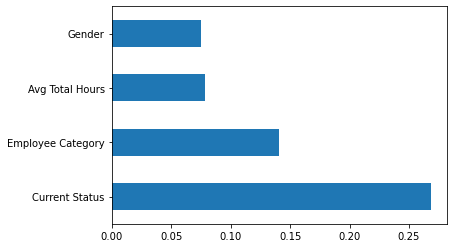

In [65]:
(pd.Series(model_RF.feature_importances_,index=predictor.columns)
 .nlargest(4)        # here we are just consider 4 largest variables.
 .plot(kind='barh'))

# In this plot the Current Status is very important and second Employee Category. And 3rd most important variable is 
# Avg Total Hours and last important variable is Gender.

# Bagging Classifier

As they provide a way to reduce overfitting, bagging methods work best with strong and complex models, in contrast with boosting methods which usually work best with weak models.

In [76]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(model_RF, random_state=1)
bagging.fit(x_train,y_train)


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=0),
                  random_state=1)

In [77]:
# Prediction the model
y_pred_bag = model_bag.predict(x_test)

In [78]:
cm = confusion_matrix(y_test, y_pred_bag)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred_bag)))

[[ 83   0   0   0   0]
 [  0 448   0   0   0]
 [  0   0   9   0   0]
 [  0   0   0  74   0]
 [  0   0   0   3   0]]
Accuracy0.9951377633711507


# Adaboost Classifier

In [79]:
# Create adaboost-decision tree classifier object
clf_ABC1 = AdaBoostClassifier(n_estimators=50,   # no. of estimators we have created 50
                             learning_rate=1,    # learning rate is 1
                             random_state=0)

In [80]:
# Train model
clf_ABC1 = clf_ABC1.fit(x_train,y_train)

# Predicting the model
y_pred_ABC1 = clf_ABC1.predict(x_test)

In [81]:
y_pred_ABC1

array([1, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 0, 0,
       1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 5, 1, 1, 1, 1,
       0, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1, 1, 3, 0, 3, 1, 0, 3, 1, 3, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 3, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 3, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 5, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 3, 1, 1, 3, 0, 1, 1, 1, 1, 3, 0, 1, 1, 3, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1,
       1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1,

In [83]:
cm = confusion_matrix(y_test, y_pred_ABC1)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred_ABC1)))

[[ 83   0   0   0   0]
 [  0 448   0   0   0]
 [  0   9   0   0   0]
 [  0   0   0  74   0]
 [  0   0   0   0   3]]
Accuracy0.9854132901134521


From the above informations, Decision Tree classifier gives optimum results.

We are going to consider that Decision Tree is best classifier.